
# <span style='color:darkgreen'> **Classification Project - Newspaper Classifier** </span>

#### by Vuyiswa Kubalasa

We create classification models using Python and deploy the best performing model using a web application with Streamlit. The primary stakeholders for the news classification project for the news outlet could include the editorial team, IT/tech support, management, readers, etc. These groups are interested in improved content categorization, operational efficiency, and enhanced user experience.

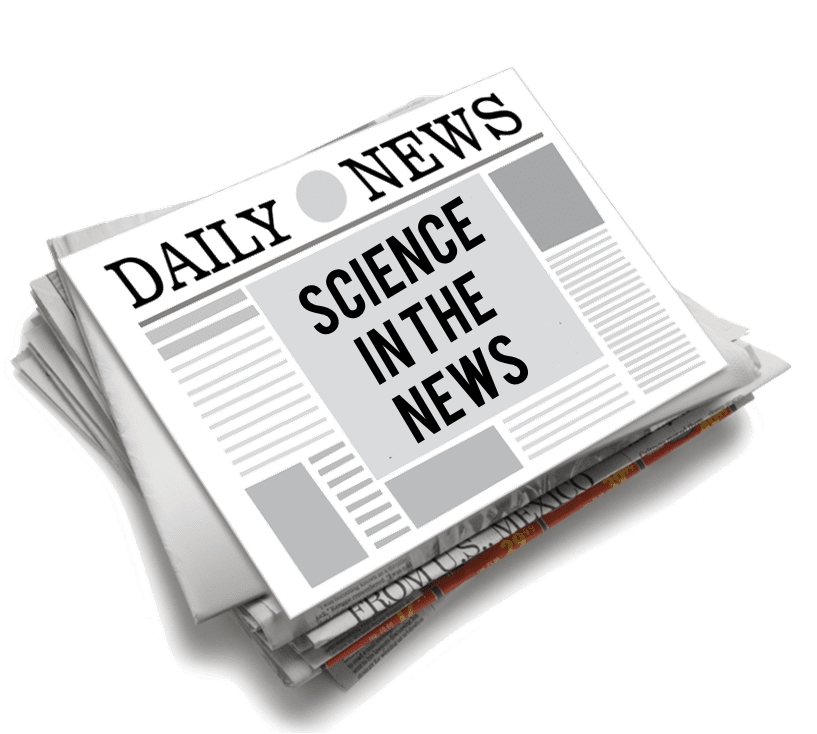



## <span style='color:steelblue'> **1. Import libraries and read in the data** </span>

In [433]:
# Import necessary libraries

#miscallenous
import pandas as pd 
import numpy as np

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.colors import ListedColormap

from sklearn.feature_extraction.text import CountVectorizer

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn import metrics

from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier


#NLP
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, TreebankWordTokenizer


from sklearn.feature_extraction.text import CountVectorizer

from sklearn.model_selection import cross_validate

from sklearn.feature_selection import chi2

# plotting
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import re

# set plot style
sns.set_theme()

In [435]:
import requests
import joblib  

In [449]:

# import image module 
from IPython.display import Image 
  
# get the image 
Image(url="https://raw.githubusercontent.com/VuyiswaK/2401PTDS_Classification_Project/blob/main/Streamlit/science-in-the-news.png", width=300, height=300) 

In [413]:
model

RandomForestClassifier(max_depth=5, max_features=1, n_estimators=10)

In [6]:
# Read the train dataset
train = pd.read_csv('https://raw.githubusercontent.com/Jana-Liebenberg/2401PTDS_Classification_Project/refs/heads/main/Data/processed/train.csv')
train.head()

,headlines,description,content,url,category
0,RBI revises definition of politically-exposed ...,The central bank has also asked chairpersons a...,The Reserve Bank of India (RBI) has changed th...,https://indianexpress.com/article/business/ban...,business
1,NDTV Q2 net profit falls 57.4% to Rs 5.55 cror...,NDTV's consolidated revenue from operations wa...,Broadcaster New Delhi Television Ltd on Monday...,https://indianexpress.com/article/business/com...,business
2,"Akasa Air ‘well capitalised’, can grow much fa...",The initial share sale will be open for public...,Homegrown server maker Netweb Technologies Ind...,https://indianexpress.com/article/business/mar...,business
3,India’s current account deficit declines sharp...,The current account deficit (CAD) was 3.8 per ...,India’s current account deficit declined sharp...,https://indianexpress.com/article/business/eco...,business
4,"States borrowing cost soars to 7.68%, highest ...",The prices shot up reflecting the overall high...,States have been forced to pay through their n...,https://indianexpress.com/article/business/eco...,business


In [7]:
# Read the test dataset
test = pd.read_csv('https://raw.githubusercontent.com/Jana-Liebenberg/2401PTDS_Classification_Project/refs/heads/main/Data/processed/test.csv')
test.head()

,headlines,description,content,url,category
0,NLC India wins contract for power supply to Ra...,State-owned firm NLC India Ltd (NLCIL) on Mond...,State-owned firm NLC India Ltd (NLCIL) on Mond...,https://indianexpress.com/article/business/com...,business
1,SBI Clerk prelims exams dates announced; admit...,SBI Clerk Prelims Exam: The SBI Clerk prelims ...,SBI Clerk Prelims Exam: The State Bank of Indi...,https://indianexpress.com/article/education/sb...,education
2,"Golden Globes: Michelle Yeoh, Will Ferrell, An...","Barbie is the top nominee this year, followed ...","Michelle Yeoh, Will Ferrell, Angela Bassett an...",https://indianexpress.com/article/entertainmen...,entertainment
3,"OnePlus Nord 3 at Rs 27,999 as part of new pri...",New deal makes the OnePlus Nord 3 an easy purc...,"In our review of the OnePlus Nord 3 5G, we pra...",https://indianexpress.com/article/technology/t...,technology
4,Adani family’s partners used ‘opaque’ funds to...,Citing review of files from multiple tax haven...,Millions of dollars were invested in some publ...,https://indianexpress.com/article/business/ada...,business


In [8]:
test['type'] = 'test'
train['type'] = 'train'
df = pd.concat([train,test])



## <span style='color:steelblue'> **2. Exploratory Data Analysis** </span>

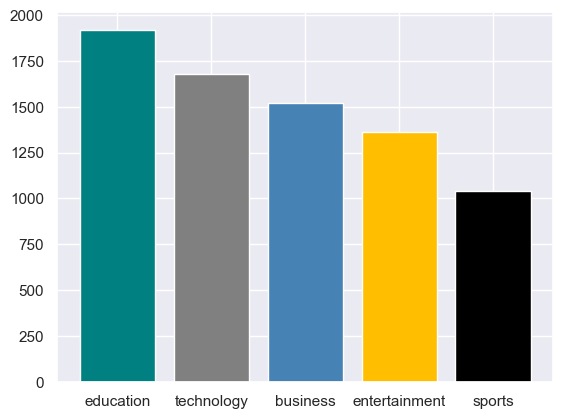

In [16]:
grouped = df.groupby(['category']).count().reset_index().sort_values(by = 'headlines', ascending = False)
plt.bar(grouped.category, grouped.headlines, color = ['teal', 'gray', 'steelblue', '#FFBF00', 'black'])
plt.show()

There are more headlines pertaining to education in the data followed by techology. However the data does not seemed too imbalanced, and thus we will use it as is.




## <span style='color:steelblue'> **3. Data Pre-processing** </span>

### **3.1. Data cleaning**

We remove the url column as it is closely correlated to the category and we will not have access to the urls when classifying the newspapers, but classification will be based purely on the headline, content or descriptions

In [22]:
df.drop("url", axis = 1, inplace = True)

We remove all punctuation, symbols, spaces, non-characters, and quotes. This can be done with regex. We apply the function to the headline, discription and content columns.

In [25]:
# Define a data cleaning function
def clean(text):

    # Make lower case
    # Convert all text in the 'post' column to lowercase
    #print ('Lowering case...')
    text= text.lower()

    # Remove punctuation
    # Define a function to remove punctuation and numbers from columns
    import string
    #|print ('Remove punctuations and numbers ...')
    punc_numbers = string.punctuation + '0123456789'
    text = re.sub(r'[^\w]', ' ', text) # ''.join([l for l in text if l not in punc_numbers])    
    text = ''.join([l for l in text if l not in '0123456789'])  
    return text 
   

Combine the test and train data, to vectorize the data at once. We will split the data again after vecorization.

In [28]:
for col in ['headlines','description','content']:
    train[col] = train[col].apply(clean)
    test[col] = test[col].apply(clean)
    df[col] = df[col].apply(clean)

In [29]:
len(df)

7520

### **3.2. Combined column**

Our model performance may work best with all the features combined, that is combining headlines, description and content to try to get as much words as possible relating to the category.

In [32]:
train['combined'] = train['headlines'] + ' ' + train['description'] + ' ' + train['content']
test['combined'] = test['headlines'] + ' ' + test['description'] + ' ' + test['content']
df['combined'] = df['headlines'] + ' ' + df['description'] + ' ' + df['content']

In [33]:
df.head()

,headlines,description,content,category,type,combined
0,rbi revises definition of politically exposed ...,the central bank has also asked chairpersons a...,the reserve bank of india rbi has changed th...,business,train,rbi revises definition of politically exposed ...
1,ndtv q net profit falls to rs crore impac...,ndtv s consolidated revenue from operations wa...,broadcaster new delhi television ltd on monday...,business,train,ndtv q net profit falls to rs crore impac...
2,akasa air well capitalised can grow much fa...,the initial share sale will be open for public...,homegrown server maker netweb technologies ind...,business,train,akasa air well capitalised can grow much fa...
3,india s current account deficit declines sharp...,the current account deficit cad was per ce...,india s current account deficit declined sharp...,business,train,india s current account deficit declines sharp...
4,states borrowing cost soars to highest so ...,the prices shot up reflecting the overall high...,states have been forced to pay through their n...,business,train,states borrowing cost soars to highest so ...


### **3.3. Remove additional words**

We will identify and remove common words that are not necessarily stop words. Words like times or months

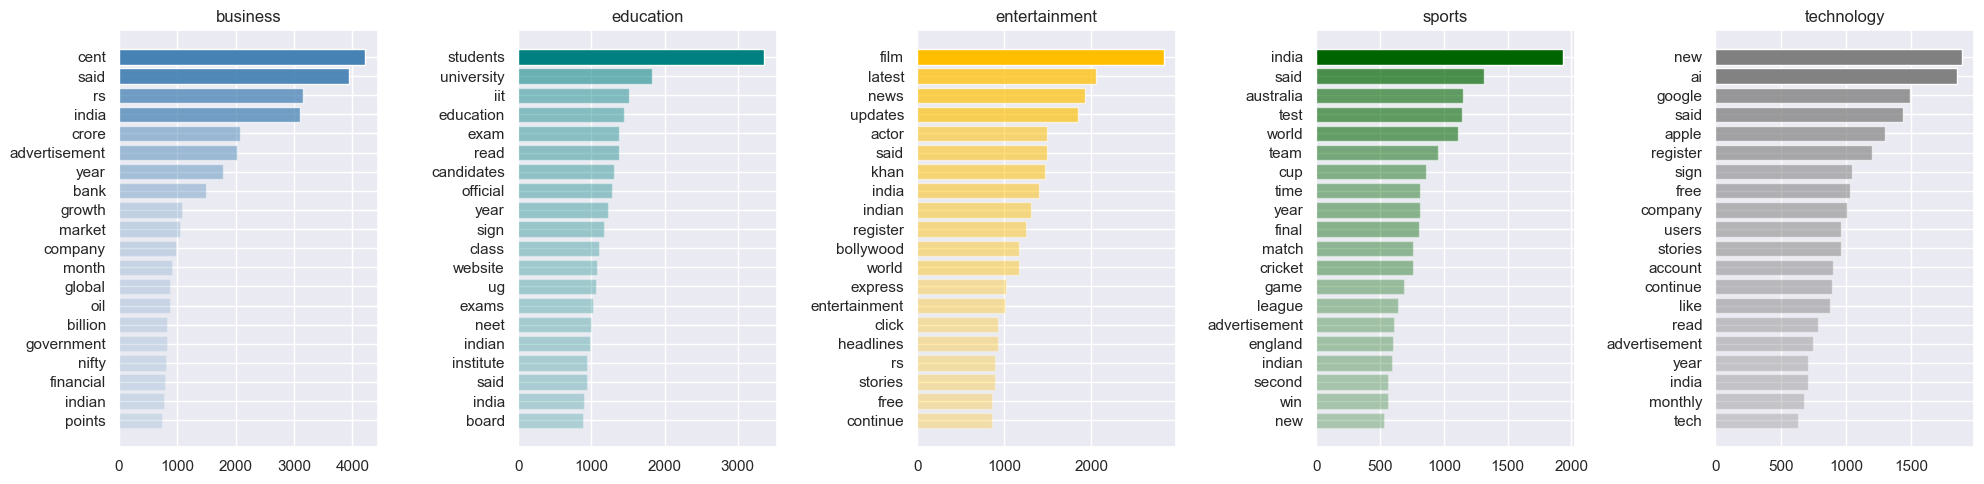

In [45]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer


# Step 1: Initialize the CountVectorize
vectorizer = CountVectorizer(stop_words='english', min_df= .1)


# Step 2: Group by class and combine the text
class_grouped = df.groupby('category')['combined'].apply(' '.join).reset_index()

classes = list(class_grouped['category'])
# Step 3: Get word counts for each class
word_counts = {}

for index, row in class_grouped.iterrows():
    # Transform the combined text into word counts
    counts = vectorizer.fit_transform([row['combined']])
    counts_array = counts.toarray()[0]  # Convert to array and take the first (and only) row
    words = vectorizer.get_feature_names_out()  # Get the words
    word_count_dict = dict(zip(words, counts_array))  # Combine words and counts

    # Step 4: Get the 10 most common words
    most_common = sorted(word_count_dict.items(), key=lambda x: x[1], reverse=True)[:20]
    word_counts[row['category']] = most_common

plt.rcParams['figure.figsize'] = (20,5)
fig, ax = plt.subplots(nrows=1, ncols=5)

colours = ['steelblue','teal', '#FFBF00', 'darkgreen', 'gray']
# Print the most common words for each class

index = 0

for class_name, common_words in word_counts.items():
    w = []
    c = []
    for word, count in common_words:
        w.append(word)
        c.append(count)
        ax[index].set_title(f'{class_name}')
        
    c.reverse()
    w.reverse()
    max_value = max(c)
    alphas = [value / max_value for value in c]

    bars = ax[index].barh(w, c, color= colours[index])
    index += 1
    # Apply transparency
    for bar, alpha in zip(bars, alphas):
        bar.set_alpha(alpha)
fig.tight_layout()
plt.show()



There are some words like year, said, new, news, india, time that appear in each category , with high word count but this words are not specific to the categories, we will therefore remove them, to make space for more category relevant words. The dataset is most likely from Inida, hence reappearance of india a number of times. We will rerun this with removed words.

In [54]:
for col in ['headlines','description','content']:
    train[col] = train[col].apply(clean)
    test[col] = test[col].apply(clean)
    df[col] = df[col].apply(clean)



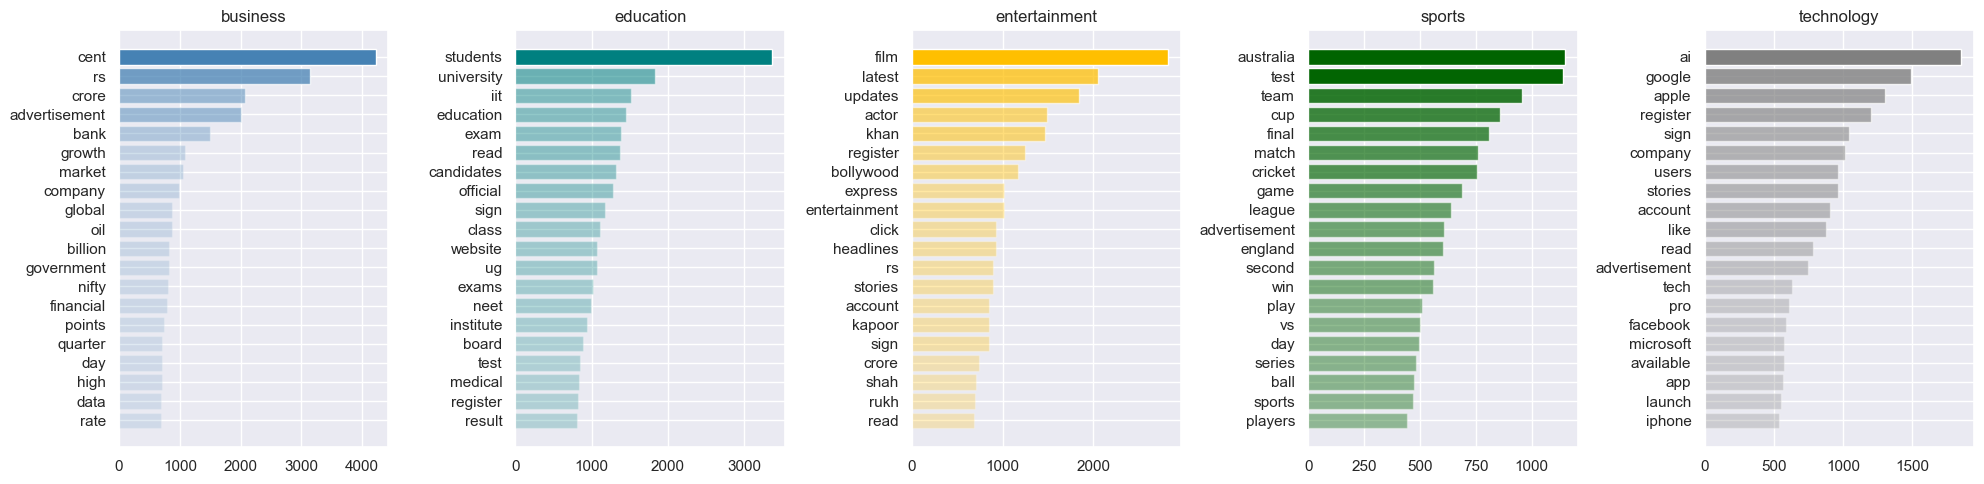

In [60]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer


# Step 1: Initialize the CountVectorize
vectorizer = CountVectorizer(stop_words='english', min_df= .1)


# Step 2: Group by class and combine the text
class_grouped = df.groupby('category')['combined'].apply(' '.join).reset_index()

class_grouped['combined'] = class_grouped['combined'].apply(lambda x: remove_specific_words(x, words_to_remove))

classes = list(class_grouped['category'])
# Step 3: Get word counts for each class
word_counts = {}

for index, row in class_grouped.iterrows():
    # Transform the combined text into word counts
    counts = vectorizer.fit_transform([row['combined']])
    counts_array = counts.toarray()[0]  # Convert to array and take the first (and only) row
    words = vectorizer.get_feature_names_out()  # Get the words
    word_count_dict = dict(zip(words, counts_array))  # Combine words and counts

    # Step 4: Get the 10 most common words
    most_common = sorted(word_count_dict.items(), key=lambda x: x[1], reverse=True)[:20]
    word_counts[row['category']] = most_common

plt.rcParams['figure.figsize'] = (20,5)
fig, ax = plt.subplots(nrows=1, ncols=5)

colours = ['steelblue','teal', '#FFBF00', 'darkgreen', 'gray']
# Print the most common words for each class

index = 0

for class_name, common_words in word_counts.items():
    w = []
    c = []
    for word, count in common_words:
        w.append(word)
        c.append(count)
        ax[index].set_title(f'{class_name}')
        
    c.reverse()
    w.reverse()
    max_value = max(c)
    alphas = [value / max_value for value in c]

    bars = ax[index].barh(w, c, color= colours[index])
    index += 1
    # Apply transparency
    for bar, alpha in zip(bars, alphas):
        bar.set_alpha(alpha)
fig.tight_layout()
plt.show()



We apply the function to the real dataframe once we are satisfied with removed words.

In [62]:
for col in ['headlines','description','content']:
    train[col] = train[col].apply(lambda x: remove_specific_words(x, words_to_remove))
    test[col] = test[col].apply(lambda x: remove_specific_words(x, words_to_remove))
    df[col] = df[col].apply(lambda x: remove_specific_words(x, words_to_remove))





## <span style='color:steelblue'> **4. Feature Selection** </span>

We want to choose the best feature as the predictor, whether we should use headlines, content, description or all combined. We use two simple models to choose the best feature:
-  a simple f1 score test using a logistic regression model and
-  feature importance score using a random forest model.

### **4.1. F1 score test**

Testing headlines as a feature... 
Testing description as a feature... 
Testing content as a feature... 
Testing combined as a feature... 
The best predictor column is: combined with a f1 score of 0.9757


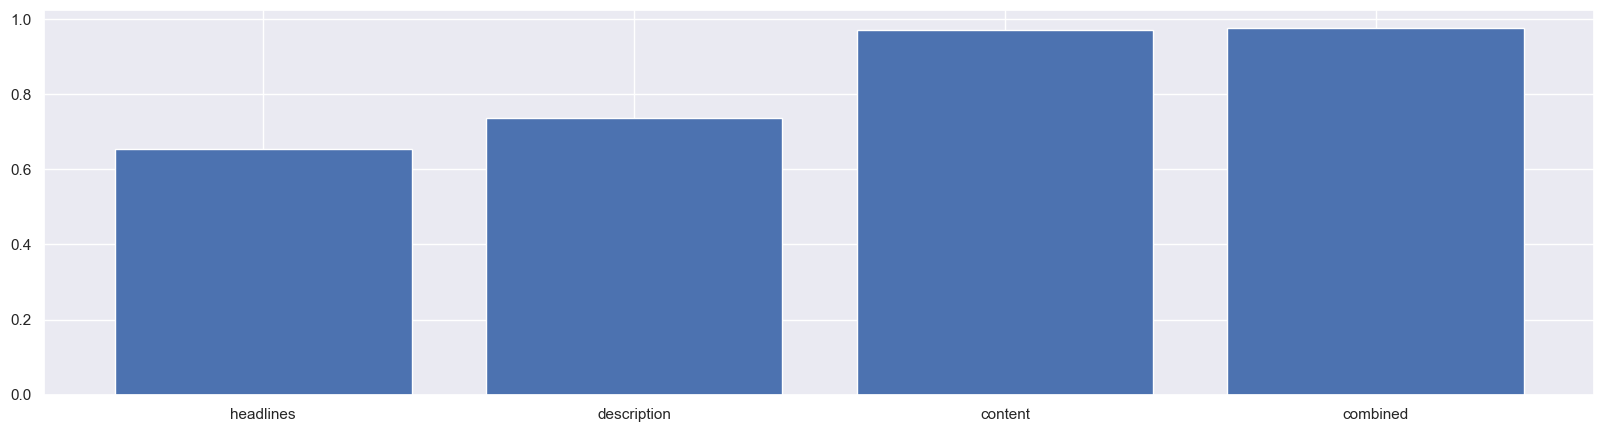

In [70]:
#from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

# Sample data
text_columns = ['headlines', 'description', 'content','combined' ]
y = df['category']


best_score = 0
best_column = None

scores_list = []


for i, col in enumerate(text_columns):
    print(f'Testing {col} as a feature... ')
    # Vectorize the text data
    vect = CountVectorizer(stop_words='english', min_df= .01)
    X = vect.fit_transform(df[col])
   
    # Train a Logistic Regression model
    model = LogisticRegression()
    scores = cross_val_score(model, X, y, cv=10, scoring='f1_macro')
    scores_list.append(scores.mean())

    
    # Check if this column has the best score
    if scores.mean() > best_score:
        best_score = scores.mean()
        best_column = col

        
print(f'The best predictor column is: {best_column} with a f1 score of {best_score:.4f}')

plt.bar(text_columns,scores_list)
plt.show()

### **4.2. Feature importance test**

Testing headlines as a feature... 
Testing description as a feature... 
Testing content as a feature... 
Testing combined as a feature... 
The best predictor column is: headlines with an average importance of 0.0125


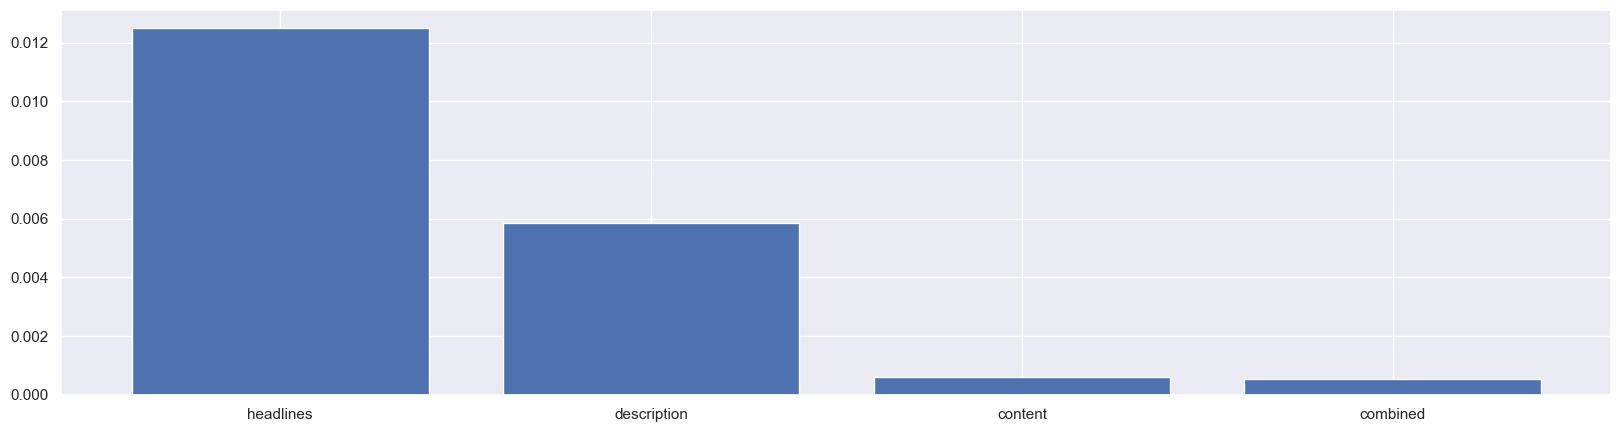

In [72]:
#from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

# Sample data
text_columns = ['headlines', 'description', 'content','combined' ]
y = df['category']

best_importance = 0
best_column = None

importance = []

for i, col in enumerate(text_columns):
    print(f'Testing {col} as a feature... ')
    # Vectorize the text data
    vect = CountVectorizer(stop_words='english', min_df= .01)
    X= vect.fit_transform(df[col])
    
    
     # Train a Random Forest model
    model = RandomForestClassifier()
    model.fit(X, y)
    
    # Get feature importances
    importances = model.feature_importances_
    avg_importance = importances.mean()
    importance.append(avg_importance)
    
    # Check if this column has the highest average importance
    if avg_importance > best_importance:
        best_importance = avg_importance
        best_column = col

print(f'The best predictor column is: {best_column} with an average importance of {best_importance:.4f}')

plt.bar(text_columns,importance)
plt.show()

Headlines has the highest feature impportance score, while combined has the best f1 score and the worst feature importance score. That could be due to it having many words, we did more test which are not included in the notebook to make the notebook more compact and readable, but based on those tests we decided to use combined as the predictor variable.


## <span style='color:steelblue'> **5. Modelling** </span>

### **5.1. Train and test data distribution**

In [352]:
col=  'combined'
y = df['category']
vect = CountVectorizer(stop_words='english', min_df= .01)
X = vect.fit_transform(df[col])


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

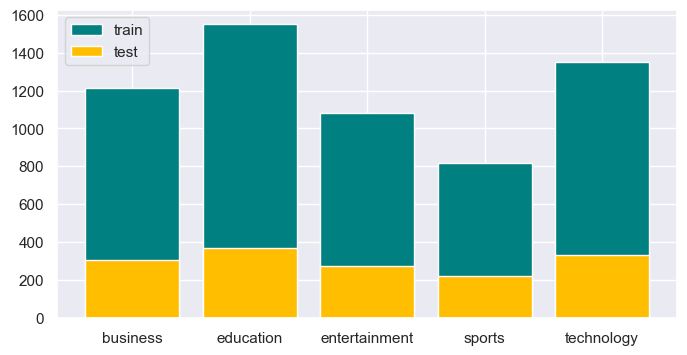

In [354]:
plt.rcParams['figure.figsize'] = (8,4)
values, counts = np.unique(list(y_train), return_counts=True)
list(counts)
plt.bar(values, counts, label = 'train', color = 'teal')
values, counts = np.unique(list(y_test), return_counts=True)
list(counts)
plt.bar(values, counts, label ='test', color = '#FFBF00')
plt.legend()
plt.show()



### **5.2. Build classification models**

In [118]:
# Define the names of the classifiers
names = ['Logistic Regression', 'Nearest Neighbors', 
         'SVM',           
         'Decision Tree', 'Random Forest']

We run the model with default parameters, and we choose the best three models which we than optimize through hyperparameter tuning

In [110]:
# Define the classifiers with their respective hyperparameters
classifiers = [
    LogisticRegression(), 
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    #SVC(gamma=2, C=1),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),    
    AdaBoostClassifier()
]

In [111]:
# Empty lists to store results
results = []  # Store evaluation metrics for each classifier
models = {}  # Store trained models
confusion = {}  # Store confusion matrices for each classifier
class_report = {}  # Store classification reports for each classifier

# Iterate over each classifier
for name, clf in zip(names, classifiers):    
    print ('Fitting {:s} model...'.format(name))
    # Measure the time taken to fit the model
    run_time = %timeit -q -o clf.fit(X_train, y_train)
    
    print ('... predicting')
    # Predict on the training data
    y_pred = clf.predict(X_train)   
    y_pred_test = clf.predict(X_test)
    
    print ('... scoring')
    # Calculate evaluation metrics
    accuracy  = metrics.accuracy_score(y_train, y_pred)
    precision = metrics.precision_score(y_train, y_pred,average='macro')
    recall    = metrics.recall_score(y_train, y_pred,average='macro')
    f1        = metrics.f1_score(y_train, y_pred,average='macro')    
    f1_test   = metrics.f1_score(y_test, y_pred_test,average='macro')    
    
    # Save the results to dictionaries
    models[name] = clf    
    confusion[name] = metrics.confusion_matrix(y_train, y_pred)
    class_report[name] = metrics.classification_report(y_train, y_pred)
    
    # Append results to the list
    results.append([name, accuracy, precision, recall, f1, f1_test, run_time.best])

    
# Convert results to DataFrame for easy visualisation
results = pd.DataFrame(results, columns=['Classifier', 'Accuracy', 'Precision', 'Recall', 'F1 Train', 'F1 Test', 'Train Time'])
results.set_index('Classifier', inplace= True)

print ('... All done!')

Fitting Logistic Regression model...
... predicting
... scoring
Fitting Nearest Neighbors model...
... predicting
... scoring
Fitting Linear SVM model...
... predicting
... scoring
Fitting Decision Tree model...
... predicting
... scoring
Fitting Random Forest model...
... predicting
... scoring
... All done!



### **5.3. Evaluate scores**

In [129]:
scores = results.sort_values('F1 Train', ascending=False).reset_index()
scores

,Classifier,Accuracy,Precision,Recall,F1 Train,F1 Test,Train Time
0,Logistic Regression,1.000000,1.000000,1.000000,1.000000,0.979235,0.165695
1,Linear SVM,0.999169,0.998973,0.999110,0.999041,0.973407,3.533919
2,Nearest Neighbors,0.949302,0.946538,0.949530,0.947487,0.879449,0.006718
3,Decision Tree,0.680020,0.838323,0.655618,0.688329,0.688830,0.080897
4,Random Forest,0.411403,0.691304,0.361165,0.345314,0.319810,0.027394


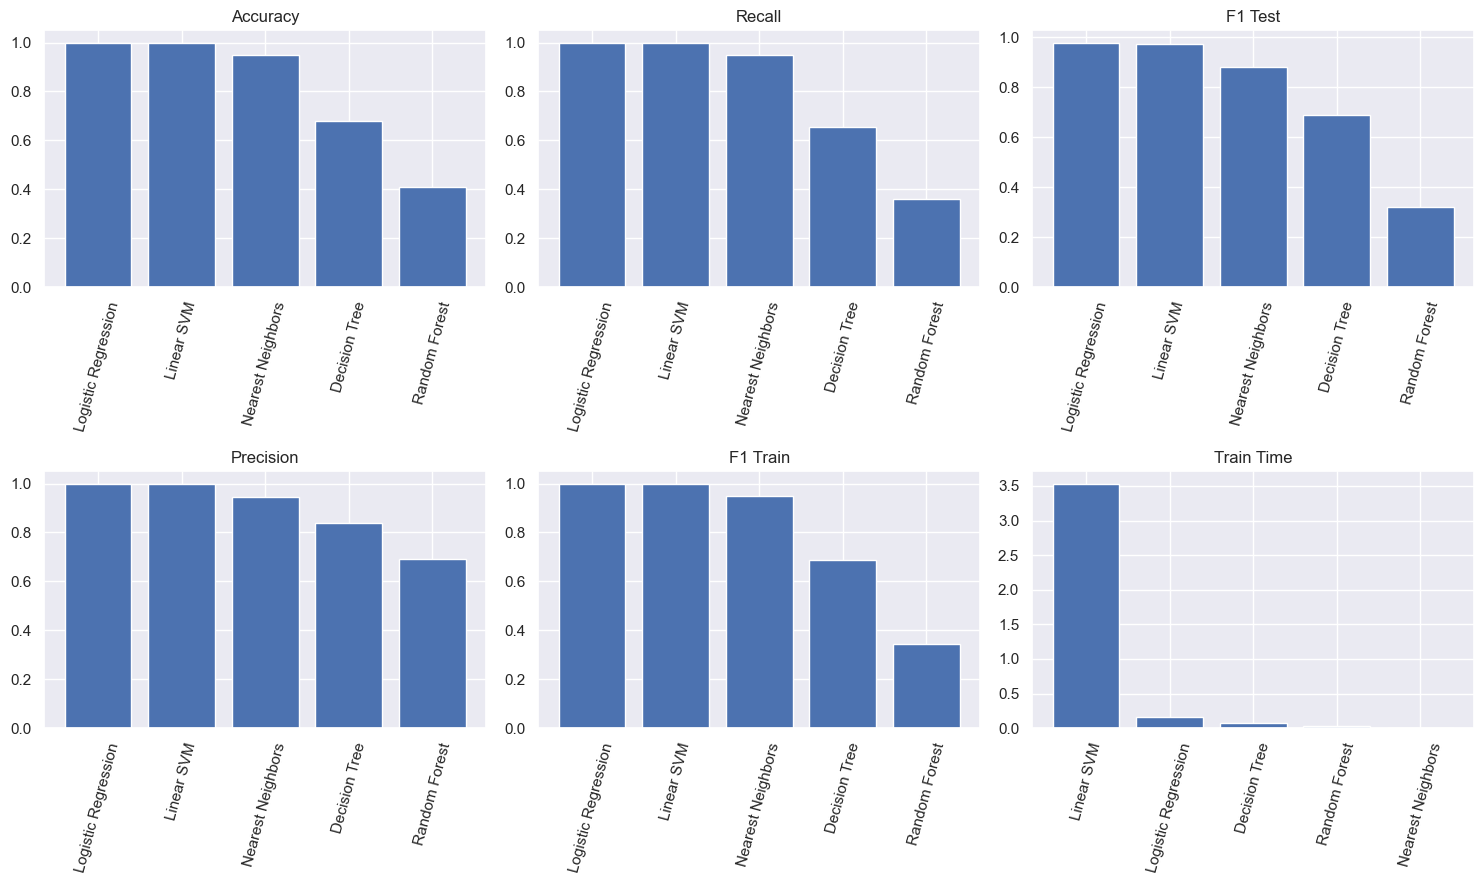

In [131]:
plt.rcParams['figure.figsize'] = (15,9)
fig, ax = plt.subplots(nrows=2, ncols=3)

index = 0
for i in range(3):
    for j in range(2):
        index += 1
        col = list(scores.columns)[index]
     
        scores = scores.sort_values(col, ascending=False)
        ax[j,i].bar(scores.Classifier, scores[col])
        ax[j,i].set_title(col)
        ax[j,i].set_xticks(scores['Classifier'])
        ax[j,i].set_xticklabels(scores['Classifier'], rotation = 75)

fig.tight_layout()
plt.show()

Logistic regression has the higher accuracy, recall, precision and F1 train at 1, however the f1_test is lower than f1_train indicating some overffiting may be taking place. SVM is the second best performing model in terms of the evlaution metrics, however the training time is quite high. We conduct a final model validation and select the top three best peforming models.




## <span style='color:steelblue'> **6. Model Validation & selection** </span>

This model validation is used to select the top 3 models with robust performance.

In [135]:
# Initialize an empty list to store cross-validation results
cv = []

# Iterate over each model in the 'models' dictionary
for name, model in models.items():
    print()  # Print an empty line for better readability
    print(name)  # Print the name of the current model
    # Perform k-fold cross-validation (with k=10) on the current model
    scores = cross_val_score(model, X=X, y=y, cv=10)
    # Calculate the mean and standard deviation of the cross-validation scores
    print("Accuracy: {:0.2f} (+/- {:0.4f})".format(scores.mean(), scores.std()))
    # Append the model name, mean cross-validation score, and standard deviation to the 'cv' list
    cv.append([name, scores.mean(), scores.std()])

# Convert the list of cross-validation results to a DataFrame
cv = pd.DataFrame(cv, columns=['Model', 'CV_Mean', 'CV_Std_Dev'])

# Set the index of the DataFrame to the model names
cv.set_index('Model', inplace=True)


Logistic Regression
Accuracy: 0.98 (+/- 0.0056)

Nearest Neighbors
Accuracy: 0.89 (+/- 0.0076)

Linear SVM
Accuracy: 0.97 (+/- 0.0060)

Decision Tree
Accuracy: 0.68 (+/- 0.0190)

Random Forest
Accuracy: 0.47 (+/- 0.0413)


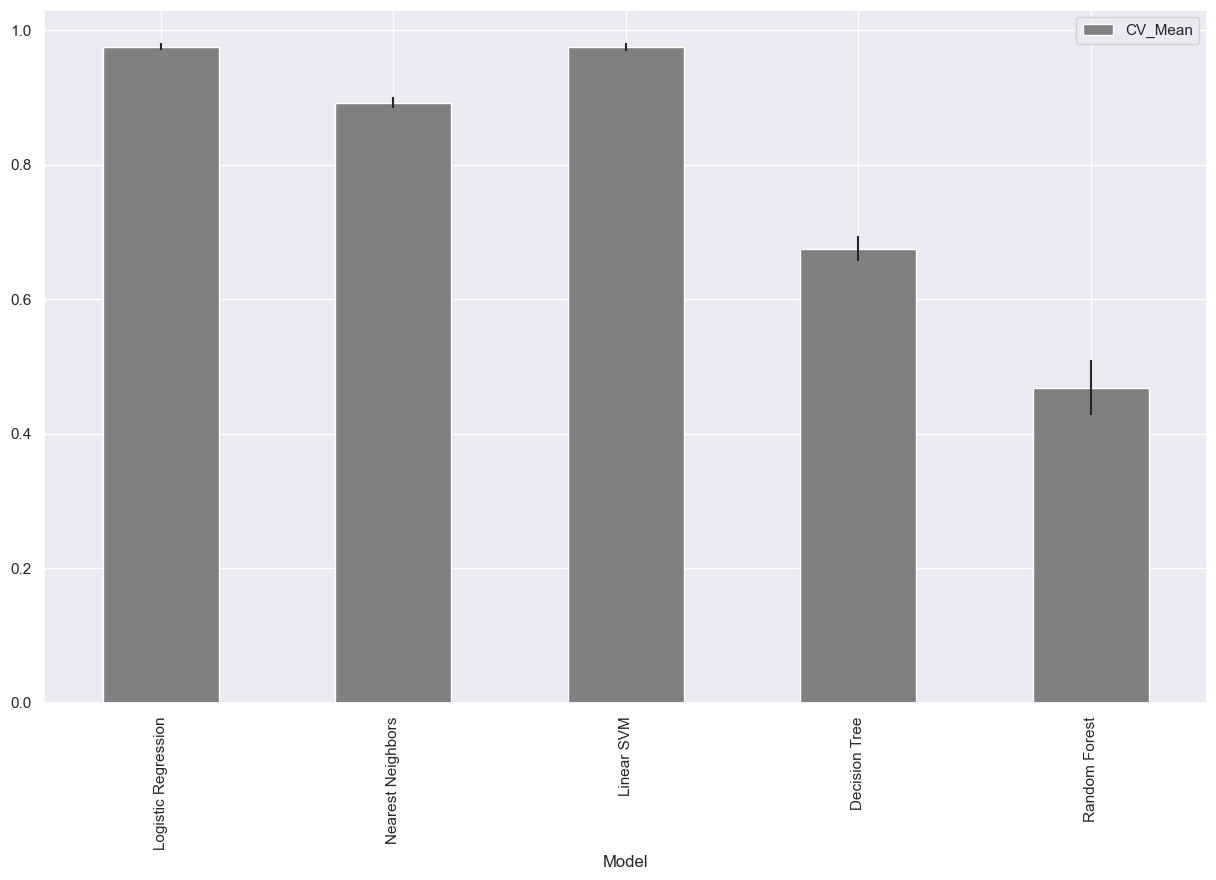

In [140]:
# Plot the mean cross-validation scores with error bars representing the standard deviation
# Set the y-axis to represent the mean cross-validation scores
# Set the error bars to represent the standard deviation of the cross-validation scores
# Limit the y-axis to the range [0.65, 0.85] for better visualization
cv.plot(y='CV_Mean', yerr='CV_Std_Dev', kind='bar',color = 'gray')
plt.show()

Our top 3 models:
- Logistic regression
- Nearest neighbours
- SVM



## <span style='color:steelblue'> **7. Hyperparameter tuning** </span>

#### **Logistic regression**

Define a range of parameters

In [309]:
from sklearn.model_selection import GridSearchCV


# Define the parameter values to be searched

param_grid = [
    {
    'C': np.linspace(0.001,1,10),
    'solver': ['lbfgs','newton-cg','liblinear']
}
]

Define model and wrap grid search

In [312]:
log_model = LogisticRegression()
log_model.fit(X_train,y_train)

lr = GridSearchCV(log_model,param_grid = param_grid, cv = 3, verbose=True,n_jobs=-1)
lr


GridSearchCV(cv=3, estimator=LogisticRegression(), n_jobs=-1,
             param_grid=[{'C': array([0.001, 0.112, 0.223, 0.334, 0.445, 0.556, 0.667, 0.778, 0.889,
       1.   ]),
                          'solver': ['lbfgs', 'newton-cg', 'liblinear']}],
             verbose=True)

Run the model with the different parameter combination and output the parameter combination with the best score

In [314]:
best_clf = lr.fit(X_train,y_train)
best_clf.best_estimator_

Fitting 3 folds for each of 30 candidates, totalling 90 fits


LogisticRegression(C=0.556, solver='liblinear')

In [315]:
print(f'Accuracy - : {best_clf.score(X_test,y_test):.3f}')

Accuracy - : 0.979


In [318]:
lr.best_params_

{'C': 0.556, 'solver': 'liblinear'}

Run model with the optimal parameter combination

In [320]:
log_model = LogisticRegression(C = lr.best_params_['C'], solver = lr.best_params_['solver'])
log_model.fit(X_train,y_train)

LogisticRegression(C=0.556, solver='liblinear')

Classification report

In [322]:
from sklearn.metrics import classification_report


y_pred = log_model.predict(X_test)  # Predictions from your trained model

# Print classification report
report = classification_report(y_test, y_pred)
print(report)


               precision    recall  f1-score   support

     business       0.95      0.98      0.97       305
    education       0.99      0.99      0.99       371
entertainment       0.99      1.00      1.00       276
       sports       0.99      0.97      0.98       221
   technology       0.97      0.95      0.96       331

     accuracy                           0.98      1504
    macro avg       0.98      0.98      0.98      1504
 weighted avg       0.98      0.98      0.98      1504



#### SVM

Define a range of parameters

In [326]:
from sklearn.model_selection import GridSearchCV


# Define the parameter values to be searched

param_grid = [
    {
    'C': [0.1, 1, 10, 100, 1000],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma':[0.1, 1, 10, 100]
}
]


Define model and wrap grid search

In [328]:
svm_model = SVC()
svm_model.fit(X_train,y_train)
svm = GridSearchCV(svm_model,param_grid = param_grid, cv = 3, verbose=True,n_jobs=-1)
svm

GridSearchCV(cv=3, estimator=SVC(), n_jobs=-1,
             param_grid=[{'C': [0.1, 1, 10, 100, 1000],
                          'gamma': [0.1, 1, 10, 100],
                          'kernel': ['linear', 'rbf', 'poly']}],
             verbose=True)

Run the model with the different parameter combination and output the parameter combination with the best score

In [329]:
best_clf = svm.fit(X_train,y_train)
best_clf.best_estimator_

Fitting 3 folds for each of 60 candidates, totalling 180 fits


SVC(C=0.1, gamma=0.1, kernel='linear')

In [334]:
print(f'Accuracy - : {best_clf.score(X_test,y_test):.3f}')

Accuracy - : 0.973


In [336]:
svm.best_params_

{'C': 0.1, 'gamma': 0.1, 'kernel': 'linear'}

Run model with the optimal parameter combination

In [338]:
svm_model = SVC( kernel = svm.best_params_['kernel'],C = svm.best_params_['C'],gamma = svm.best_params_['gamma'])
svm_model.fit(X_train,y_train)

SVC(C=0.1, gamma=0.1, kernel='linear')

Classification report

In [360]:
from sklearn.metrics import classification_report


y_pred = log_model.predict(X_test)  # Predictions from your trained model

# Print classification report
report = classification_report(y_test, y_pred)
print(report)

               precision    recall  f1-score   support

     business       0.95      0.98      0.97       305
    education       0.99      0.99      0.99       371
entertainment       0.99      1.00      1.00       276
       sports       0.99      0.97      0.98       221
   technology       0.97      0.95      0.96       331

     accuracy                           0.98      1504
    macro avg       0.98      0.98      0.98      1504
 weighted avg       0.98      0.98      0.98      1504



#### Nearest Neighbour

Define a range of parameters

In [368]:
from sklearn.model_selection import GridSearchCV

# Define the parameter values to be searched

param_grid = [{ 'n_neighbors': (3,17, 2),
    'leaf_size': (20,40,1),
    'p': (1,2),
    'weights': ('uniform', 'distance')}]

Define model and wrap grid search

In [371]:
knn_model =  KNeighborsClassifier()
knn_model.fit(X_train,y_train)
kn = GridSearchCV(knn_model,param_grid = param_grid, cv = 3, verbose=True,n_jobs=-1)
kn

GridSearchCV(cv=3, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid=[{'leaf_size': (20, 40, 1), 'n_neighbors': (3, 17, 2),
                          'p': (1, 2), 'weights': ('uniform', 'distance')}],
             verbose=True)

In [373]:
best_clf = kn.fit(X_train,y_train)
best_clf.best_estimator_

Fitting 3 folds for each of 36 candidates, totalling 108 fits


KNeighborsClassifier(leaf_size=20, n_neighbors=3)

In [375]:
print(f'Accuracy - : {best_clf.score(X_test,y_test):.3f}')

Accuracy - : 0.881


In [377]:
clf.best_params_

{'leaf_size': 20, 'n_neighbors': 3, 'p': 2, 'weights': 'uniform'}

Run model with the optimal parameter combination

In [380]:

knn_model  = KNeighborsClassifier( leaf_size=clf.best_params_['leaf_size'], p=clf.best_params_['p'], n_neighbors=clf.best_params_['n_neighbors'], weights= clf.best_params_['weights'])
knn_model.fit(X_train,y_train)

KNeighborsClassifier(leaf_size=20, n_neighbors=3)

Classification report

In [383]:
from sklearn.metrics import classification_report


y_pred = log_model.predict(X_test)  # Predictions from your trained model

# Print classification report
report = classification_report(y_test, y_pred)
print(report)

               precision    recall  f1-score   support

     business       0.95      0.98      0.97       305
    education       0.99      0.99      0.99       371
entertainment       0.99      1.00      1.00       276
       sports       0.99      0.97      0.98       221
   technology       0.97      0.95      0.96       331

     accuracy                           0.98      1504
    macro avg       0.98      0.98      0.98      1504
 weighted avg       0.98      0.98      0.98      1504




## <span style='color:steelblue'> **8. Final model** </span>

Logistic regression is the best model

In [389]:
import os 
path = os.getcwd()

In [391]:
import joblib

joblib.dump(log_model, path + '\\Streamlit\\classification_model.pkl')


['C:\\Users\\vuyis\\OneDrive\\EDSA\\Classification\\2401PTDS_Classification_Project\\Streamlit\\classification_model.pkl']

In [393]:
vect = CountVectorizer(stop_words='english', min_df= .01)
X = vect.fit_transform(df[col])
y = df['category']
joblib.dump(vect , path + '\\Streamlit\\tfidfvect.pkl')

['C:\\Users\\vuyis\\OneDrive\\EDSA\\Classification\\2401PTDS_Classification_Project\\Streamlit\\tfidfvect.pkl']